# Analysis of State Vector Simulator

In this notebook, we will analyze the matrix and tensor simulators which we built. The analysis will include:

- Plotting the runtime of simulators as a function of the number of qubits.
- Comparing matrix simualtor and tensor simulator.
- See how many qubits can we simulate.

*Note: I haven't remove the memory error occured when analyzing how many qubits can we simulate. Through the error we can infere, the max count of qubits we can simulate.*

### Table of content

- [Packages](#0)
- [1. Simulation setup](#1)
    - [1A. Naive simulation using matrix multiplication](#1-A)
    - [1B. Advanced simulation using tensor multiplication](#1-B)
- [2. Setting Up Simulation Functions Across Qubit Range](#2)
    - [2A. Run simulations over a range of qubits](#2-A)
    - [2B. Plotting the results](#2-B)
- [3. Analyzing the runtimes](#3)
- [4. Analyzing Qubit Simulation Limits](#4)
    - [4A. Matrix simulator qubit limit](#4-A)
    - [4B. Tensor simulator qubit limit](#4-B)
- [5. Conclusion](#5)


<a name='0'></a>
### Packages

Before we begin, we will add the src directory in sys.paths so that we can import the code from it. 

In [2]:
import sys
import os

# Add the src directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

Importing all the necessary packages

In [3]:
import time
import matplotlib.pyplot as plt

from gates import Gates
from matrix_simulation import NaiveQuantumCircuit
from tensor_simulation import AdvanceQuantumCircuit

<a name='1'></a>
### 1. Simulation setup

Here we will write functions that we setup simulators with qubit_count as argument. These functions will be used to automatically apply gates to the circuit. 

<a name='1-A'></a>
#### 1A. Naive simulation using matrix multiplication

The function `apply_operations_matrix` will make a circuit of `num_qubits` qubits using matrix multiplication (naive) simulator. It will apply *Hadamard Gate* to all odd number of qubits. For each even qubit, it will apply a *CNOT Gate* whose target qubit will be the even qubit and control qubit will be one qubit before it. After applying all the operations, it will return time taken to excute the operations.

This function also has an optional arguments, `print_probabilities` which will print the probability distribution of each state. By default it is set to false. 

In [17]:
def apply_operations_matrix(num_qubits, print_probabilities=False):
    start_time = time.time()
    
    naive_circuit = NaiveQuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        if (qubit + 1) % 2 != 0:
            naive_circuit.apply_single_qubit_gate(Gates.H, qubit)  # Apply H gate
        else:
            naive_circuit.apply_cnot_gate(qubit-1, qubit)  # Apply CNOT gate
            
    end_time = time.time()
    
    if print_probabilities:
        print(f"For {num_qubits} qubits:")
        print(f"Probabilities: {naive_circuit.get_probabilities()}")
        
    return end_time - start_time
    

Let's test the function on a range of qubits from 1 to 6. We will print the probability distribution of each state. We will chech the distributions to see whether our simulator is giving correct output and working as expected. 

In [18]:
qubit_counts = range(1,6 + 1) # +1 because upper limit is not included in range

# Perform analysis for each qubit count
for num_qubits in qubit_counts:
    time_taken = apply_operations_matrix(num_qubits, print_probabilities=True)
    print(f"Time taken: {time_taken} sec")
    print("---------------------------------------------------------------------------")

For 1 qubits:
Probabilities: {'|0>': 0.5, '|1>': 0.5}
Time taken: 0.0009319782257080078 sec
---------------------------------------------------------------------------
For 2 qubits:
Probabilities: {'|00>': 0.5, '|01>': 0.0, '|10>': 0.0, '|11>': 0.5}
Time taken: 0.0010521411895751953 sec
---------------------------------------------------------------------------
For 3 qubits:
Probabilities: {'|000>': 0.25, '|001>': 0.25, '|010>': 0.0, '|011>': 0.0, '|100>': 0.0, '|101>': 0.0, '|110>': 0.25, '|111>': 0.25}
Time taken: 0.0024847984313964844 sec
---------------------------------------------------------------------------
For 4 qubits:
Probabilities: {'|0000>': 0.25, '|0001>': 0.0, '|0010>': 0.0, '|0011>': 0.25, '|0100>': 0.0, '|0101>': 0.0, '|0110>': 0.0, '|0111>': 0.0, '|1000>': 0.0, '|1001>': 0.0, '|1010>': 0.0, '|1011>': 0.0, '|1100>': 0.25, '|1101>': 0.0, '|1110>': 0.0, '|1111>': 0.25}
Time taken: 0.0013289451599121094 sec
----------------------------------------------------------------

From the above probability distributions, we can confirm that our function is working as expected and we can use it perform our analysis.

<a name='1-B'></a>
#### 1B. Advanced simulation using tensor multiplication

Similary function `apply_operations_tensor` will make a circuit of `num_qubits` qubits using tensor multiplication (advance) simulator. It will apply *Hadamard Gate* to all odd number of qubits. For each even qubit, it will apply a *CNOT Gate* whose target qubit will be the even qubit and control qubit will be one qubit before it. After applying all the operations, it will return time taken to excute the operations.

This function also has an optional arguments, `print_probabilities` which will print the probability distribution of each state. By default it is set to false

In [27]:
def apply_operations_tensor(num_qubits, print_probabilities=False):
    start_time = time.time()
    
    advance_circuit = AdvanceQuantumCircuit(num_qubits)
    for qubit in range(num_qubits):
        if (qubit + 1) % 2 != 0:
            advance_circuit.apply_single_qubit_gate(Gates.H, qubit)  # Apply H gate
        else:
            advance_circuit.apply_cnot_gate(qubit-1, qubit)  # Apply CNOT gate
    
    end_time = time.time()
    
    if print_probabilities:
        print(f"For {num_qubits} qubits:")
        print(f"Probabilities: {advance_circuit.get_probabilities()}")
        
    return end_time - start_time
            

Let's test the function on a range of qubits from 1 to 6. We will print the probability distribution of each state. We will chech the distributions to see whether our simulator is giving correct output and working as expected. 

In [30]:
qubit_counts = range(1,6 + 1)

# Perform analysis for each qubit count
for num_qubits in qubit_counts:
    time_taken = apply_operations_tensor(num_qubits, print_probabilities=True)
    print(f"Time taken: {time_taken} sec")
    print("---------------------------------------------------------------------------")

For 1 qubits:
Probabilities: {'|0>': 0.5, '|1>': 0.5}
Time taken: 0.00036263465881347656 sec
---------------------------------------------------------------------------
For 2 qubits:
Probabilities: {'|00>': 0.5, '|01>': 0.0, '|10>': 0.0, '|11>': 0.5}
Time taken: 0.0004985332489013672 sec
---------------------------------------------------------------------------
For 3 qubits:
Probabilities: {'|000>': 0.25, '|001>': 0.25, '|010>': 0.0, '|011>': 0.0, '|100>': 0.0, '|101>': 0.0, '|110>': 0.25, '|111>': 0.25}
Time taken: 0.0010254383087158203 sec
---------------------------------------------------------------------------
For 4 qubits:
Probabilities: {'|0000>': 0.25, '|0001>': 0.0, '|0010>': 0.0, '|0011>': 0.25, '|0100>': 0.0, '|0101>': 0.0, '|0110>': 0.0, '|0111>': 0.0, '|1000>': 0.0, '|1001>': 0.0, '|1010>': 0.0, '|1011>': 0.0, '|1100>': 0.25, '|1101>': 0.0, '|1110>': 0.0, '|1111>': 0.25}
Time taken: 0.0009968280792236328 sec
---------------------------------------------------------------

From the above probability distributions, we can confirm that our function is working as expected and we can use it perform our analysis.

<a name='2'></a>
### 2. Setting Up Simulation Functions Across Qubit Range

Now that we have our functions to apply operations to simulator automatically based on qubit-count ready, we will create functions to to use them over a range of qubits and to plot thier runtimes against number of qubits.

<a name='2-A'></a>
##### 2A. Run simulations over a range of qubits

The following function creates simulators (both matrix and tensor) and apply the operations over a range of qubits starting from 1. It continues to create simulators util it has reached the upper limit which we will pass a parameter `qubit_upper_limit` to the function.

It returns a dictionary of list of runtimes of simulator, which we will plot later.

In [31]:
def run_simulations(qubit_upper_limit):
    # Number of qubits to test for each simulation type
    qubit_counts = range(1, qubit_upper_limit + 1)  

    # Store runtimes
    matrix_simulation_times = []  
    tensor_simulation_times = []
    
    # Perform analysis for each qubit count
    for num_qubits in qubit_counts:
        # MATRIX SIMULATION
        time_taken_matrix = apply_operations_matrix(num_qubits)
        matrix_simulation_times.append(time_taken_matrix)
        
        # TENSOR SIMULATION
        time_taken_tensor = apply_operations_tensor(num_qubits)
        tensor_simulation_times.append(time_taken_tensor)
        
    return {"matrix_simulation_times": matrix_simulation_times,
            "tensor_simulation_times": tensor_simulation_times}

<a name='2-B'></a>
##### 2B. Plotting the results

The following function will plot the matrix and tensor runtimes against number of qubits. It will take the following parameters:
- `qubit_upper_limit`: Upper limit of qubit till which we simulated the operations. 
- `matrix_simulation_times`: List of runtimes of matrix simulation.
- `tensor_simulation_times`: List of runtimes of tensor simulation.

In [40]:
def plotting_runtimes(qubit_upper_limit, matrix_simulation_times, tensor_simulation_times):
    qubit_counts = range(1, qubit_upper_limit + 1)  
    
    plt.figure(figsize=(12, 6))
    plt.plot(qubit_counts, matrix_simulation_times, label="Matrix Simulation", marker='o')
    plt.plot(qubit_counts, tensor_simulation_times, label="Tensor Simulation", marker='x')
    plt.xlabel("Number of Qubits")
    plt.ylabel("Runtime (seconds)")
    plt.title("Runtime of Matrix vs Tensor Simulation as a function of number of Qubits")
    plt.legend()
    plt.grid()
    plt.show()

Combining both the functions to create a final function, which we will use in analysis process. 

In [45]:
def analyze_runtimes(qubit_upper_limit, print_comparisons=False):
    runtimes = run_simulations(qubit_upper_limit)
    plotting_runtimes(qubit_upper_limit, runtimes["matrix_simulation_times"], runtimes["tensor_simulation_times"])

<a name='3'></a>
### 3. Analyzing the runtimes

Now that we have everything setup, we can finally begin our analysis. We will begin from a range of 1 to 5 qubits (5 included), and keep increasing upper limit by 5, till we reach threshold of qubits that can be simulated. 

We are starting from 5 to see differences in matrix and tensor simulations from a low qubit count.

##### For 1 to 5 Qubits

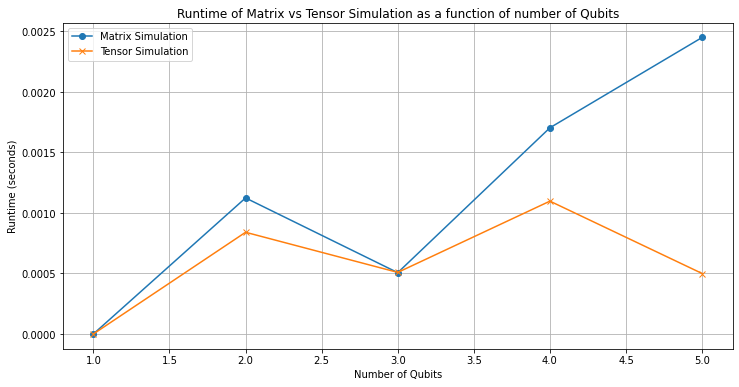

In [91]:
analyze_runtimes(5)

Here we can clearly see that Matrix simulation is taking more time than that of Tensor simulation.

##### For 1 to 10 Qubits

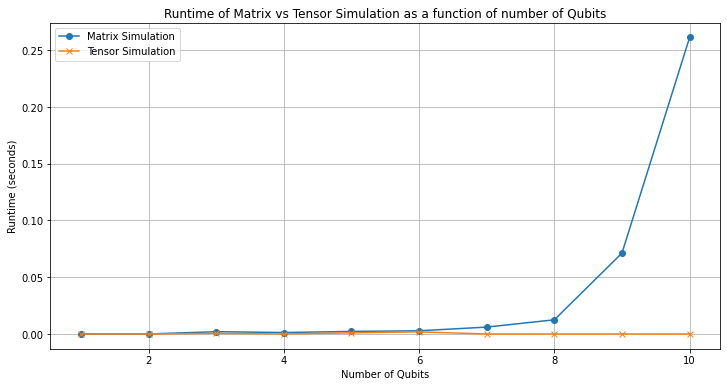

In [92]:
analyze_runtimes(10)

Here we observe that the difference between runtimes of matrix simulator and tensor simulator increases exponentially as we increase the number of qubit. 

##### For 1 to 15 Qubits

In [106]:
analyze_runtimes(15)

MemoryError: Unable to allocate 8.00 GiB for an array with shape (16384, 32768, 2) and data type float64

Here we have encountered an Memory error, which means that we cann't simulated 15 qubits on this system (details of system used is documented in analysis.md file). We will later analyze that this whether this limit is for matix simulator or tensor simulator or both.

##### For 1 to 13 Qubits

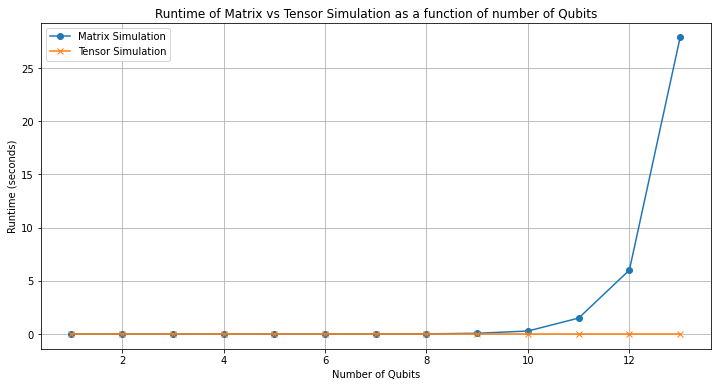

In [117]:
analyze_runtimes(13)

##### For 1 to 14 Qubits

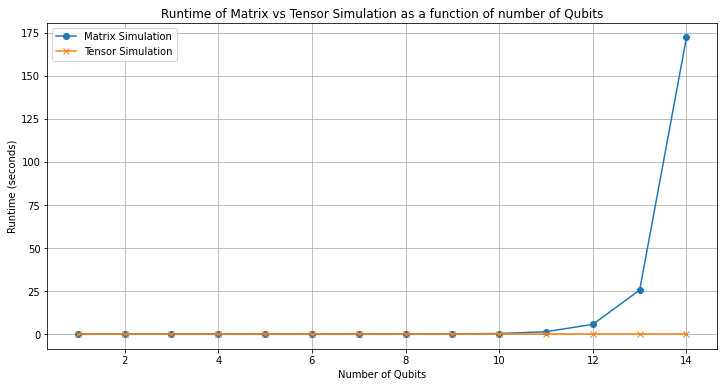

In [122]:
analyze_runtimes(14)

The difference between the runtimes is exponential similar to our previous observations.

**From these observations we can conclude that tensor simulation generally scales better for larger quantum circuits due to its efficient use of memory compared to matrix simulation.**

<a name='4'></a>
### 4. Analyzing Qubit Simulation Limits

<a name='4-A'></a>
##### 4A. Matrix simulator qubit limit

Previously we were able to simulate 14 qubits, so let's start from there. We will increment the qubits till we get memoery error. Also let's see if qubit count can exceed 15. 

In [123]:
runtime = apply_operations_matrix(14)
print(runtime)

204.16851544380188


As we did during runtime analysis, we were again able to simulate 1 qubits on the naive simulator. We ran simulation for 14 qubits again, just to be double sure.   

In [124]:
runtime = apply_operations_matrix(15)
print(runtime)

MemoryError: Unable to allocate 8.00 GiB for an array with shape (16384, 32768, 2) and data type float64

Similar to our runtime analysis, we have got a memory error for 15 qubits.

**From these observations, we can infer that maximum qubit circuit that can be simulated by matrix multipication (naive) simulator is _14_**

<a name='4-B'></a>
##### 4B. Tensor simulator qubit limit

Let's start from 15 qubits.

In [131]:
runtime = apply_operations_tensor(15)
print(runtime)

0.006733417510986328


For tensor simulator we were able to simulate 15 qubits circuit. Also we can observe that it ran very quickly. We will also run tensor simultion for 13 and 14 qubits, so that we can document this data and use it for comparison. 

In [134]:
print(f"Time taken for 13 qubits in sec: {apply_operations_tensor(13)}")
print(f"Time taken for 14 qubits in sec: {apply_operations_tensor(14)}")

Time taken for 13 qubits in sec: 0.002005338668823242
Time taken for 14 qubits in sec: 0.003535747528076172


Let's do some trail and error and try to find circuit of how many qubits can be simulated by the Advance simulator. 

In [135]:
print(f"Time taken for 20 qubits in sec: {apply_operations_tensor(20)}")

Time taken for 20 qubits in sec: 0.2288951873779297


In [136]:
print(f"Time taken for 25 qubits in sec: {apply_operations_tensor(25)}")

Time taken for 25 qubits in sec: 10.583866834640503


In [137]:
print(f"Time taken for 30 qubits in sec: {apply_operations_tensor(30)}")

MemoryError: Unable to allocate 8.00 GiB for an array with shape (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2) and data type float64

We have encountered memory error. Now let's try to reduce number of qubits. We will do this till we don't encounter memory error. 

In [138]:
print(f"Time taken for 29 qubits in sec: {apply_operations_tensor(29)}")

Time taken for 29 qubits in sec: 677.8391125202179


**From these observations, we can infer that maximum qubit circuit that can be simulated by tensor multipication (advance) simulator is _29_**

<a name='5'></a>
### 5. Conclusion

From the analysis and observations, we can conclude the following points:
- Tensor simulator takes less time to execute compared to matrix simulator.
- Difference between runtimes of tensor simulator and matrix simulator grows expotential bigger as we increase the number of qubits to be simulated.
- The matrix simulator is capable of simulating circuits with a maximum of 14 qubits.
- The tensor simulator is capable of simulating circuits with a maximum of 29 qubits.